In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('./df_OH.csv')

# Only Ohio bridges
df = df[df['STATE_CODE_001']==39]

In [75]:
df.head()

,DETERIORATION_RATE,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,elevation
0,0.166667,2,0,42,3,21.9,59.1,12.8,1,36.0,2,601.51,1.0,0,-83.401167,38.563001,1,0,211.008438
1,0.214286,2,0,42,3,21.9,59.1,12.8,1,36.0,2,601.51,1.0,0,-83.401335,38.563001,1,0,215.009430
2,0.066667,2,0,10,3,40.0,104.9,14.1,1,20.0,2,288.96,1.0,1,-83.271668,38.536502,1,0,281.445312
3,0.129630,2,0,0,3,24.4,56.7,14.3,1,21.0,2,329.40,1.0,2,-83.372834,38.410834,1,0,340.709839
4,0.187500,2,0,0,3,30.8,76.8,12.2,2,36.0,2,144.04,1.0,1,-83.349003,38.416168,1,0,280.783264


In [92]:
df['elevation'].isna().value_counts()

False    4337
True        3
Name: elevation, dtype: int64

In [93]:
df.dropna(inplace = True)

In [94]:
df.shape

(4337, 19)

In [6]:
df['DETERIORATION_RATE'].describe()

count    4.340000e+03
mean     1.112636e-01
std      9.945249e-02
min      8.881784e-17
25%      5.000000e-02
50%      8.333333e-02
75%      1.428571e-01
max      1.000000e+00
Name: DETERIORATION_RATE, dtype: float64

In [77]:
# Shuffle our dataframe first since bridges are ordered by state code in the df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df.head()

,DETERIORATION_RATE,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,SURFACE_TYPE_108A_concrete,SURFACE_TYPE_108A_none
0,0.088889,39,4,0,15,9,27.1,217.3,18.3,27.0,2,418.84,1.0,1,-81.288500,41.081503,1,1,1,0
1,0.050000,39,4,0,10,4,17.2,60.5,21.7,19.0,0,447.46,1.0,0,-84.213669,39.133669,1,1,1,0
2,0.055556,39,4,0,55,4,33.2,106.7,18.0,13.0,2,548.90,1.0,0,-80.375502,41.043669,1,1,1,0
3,0.300000,39,2,0,0,1,7.9,8.5,7.2,13.0,1,1.92,2.0,2,-83.238168,38.489001,1,0,0,0
4,0.220000,39,2,0,12,4,18.6,67.4,10.6,55.0,1,58.95,1.0,0,-83.290667,40.581503,1,0,1,0


In [78]:
list(df.columns)

['DETERIORATION_RATE',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'elevation']

df.drop(['STATE_CODE_001'], axis = 1, inplace = True)

In [96]:
# Data Preparation
X = df[[
     'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'elevation']] 

y = df['DETERIORATION_RATE'] 

In [97]:
# Split into train and test
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [82]:
X_train.shape

(3472, 18)

In [83]:
# Mean model - predicts the average of the labels in the training data

pred1 = y_train.mean()
pred1

0.11085781490015419

In [84]:
dfr=pd.DataFrame()
dfr['y_real'] = y_train
dfr['y_pred1'] = pred1

In [85]:
dfr.head()

,y_real,y_pred1
227,0.100000,0.110858
964,0.144444,0.110858
2045,0.028571,0.110858
1025,0.244444,0.110858
4242,0.111111,0.110858


In [86]:
# Mean Absolute Error for mean model

dfr['resid1'] = np.abs(dfr['y_real']-dfr['y_pred1'])
dfr['resid1'].mean()

0.06749906688344522

In [87]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,dfr['y_pred1'])

0.06749906688344506

In [88]:
# Mean Squared Error for mean model
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,dfr['y_pred1']))

0.09895773210745332

### Linear regression

In [89]:
# Linear regression is the benchmark in a regression problem

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [99]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
y_pred = reg.predict(X_test)

In [101]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.06466907683357875

In [102]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.09437685203019362

The fit of the linear regression model is better than the fit of the mean model.

In [26]:
# Plot of the residuals
y_resid = y_test-y_pred

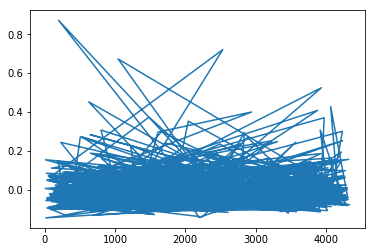

In [27]:
plt.plot(y_resid)

In [103]:
y_train_pred = reg.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.0969377777419932

In [104]:
# R2 score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.06846936503719792

R2 score is very low, which means that the features we are using as indepedent variables do not explain properly the deterioration rate of the bridges.

In [105]:
r2_score(y_train,y_train_pred)

0.05736713376260427

### Ridge regularization

In [123]:
from sklearn.linear_model import Ridge
ridge = GridSearchCV(Ridge(),param_grid={"alpha": np.arange(0.5,100.5,0.5)},cv = 5)
ridge.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0.5,   1. , ...,  99.5, 100. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [124]:
ridge.best_score_

0.05145178583273383

In [125]:
ridge.best_params_

{'alpha': 28.5}

In [126]:
ridge.best_estimator_

Ridge(alpha=28.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
ridge_final = ridge.best_estimator_

In [129]:
r2_score(y_test,ridge_final.predict(X_test))

0.07673205396737837

In [130]:
np.sqrt(mean_squared_error(y_test,ridge_final.predict(X_test)))

0.0939573577716452

### K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsRegressor

regknn = KNeighborsRegressor(n_neighbors=38)

regknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=38, p=2,
          weights='uniform')

In [33]:
mean_absolute_error(y_test,regknn.predict(X_test))

0.0671926933148283

In [34]:
np.sqrt(mean_squared_error(y_test,regknn.predict(X_test)))

0.09894947340991962

In [35]:
r2_score(y_test,regknn.predict(X_test))

0.04652631524514472

In [36]:
# Para ver que valor de k es el mejor tendré que ir probando
maes = []
for i in range(2,50):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

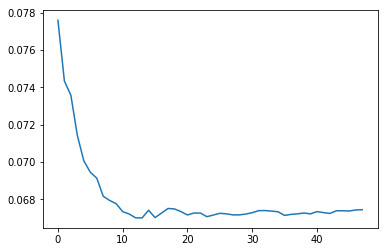

In [37]:
plt.plot(maes)

regknn10 = KNeighborsRegressor(n_neighbors=10)

regknn10.fit(X_train,y_train)

mean_absolute_error(y_test,regknn10.predict(X_test))

np.sqrt(mean_squared_error(y_test,regknn10.predict(X_test)))

regknn50 = KNeighborsRegressor(n_neighbors=50)

regknn50.fit(X_train,y_train)

np.sqrt(mean_squared_error(y_test,regknn50.predict(X_test)))

In [38]:
# GridSearchCV with RMSE score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(3,40)}, scoring = 'neg_mean_squared_error')
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
reg_test.best_params_

{'n_neighbors': 38}

In [40]:
reg_test.best_score_

-0.009520903870255603

In [42]:
np.sqrt(-reg_test.best_score_)

0.09757511911473951

In [41]:
reg_test.scoring

'neg_mean_squared_error'

In [43]:
reg_final = reg_test.best_estimator_

In [44]:
r2_score(y_test,reg_final.predict(X_test))

0.09540884813963446

# GridSearchCV with R2 score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(5,50)}, 
                        scoring='r2')
reg_test.fit(X,y)

reg_test.best_params_

reg_test.best_score_

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

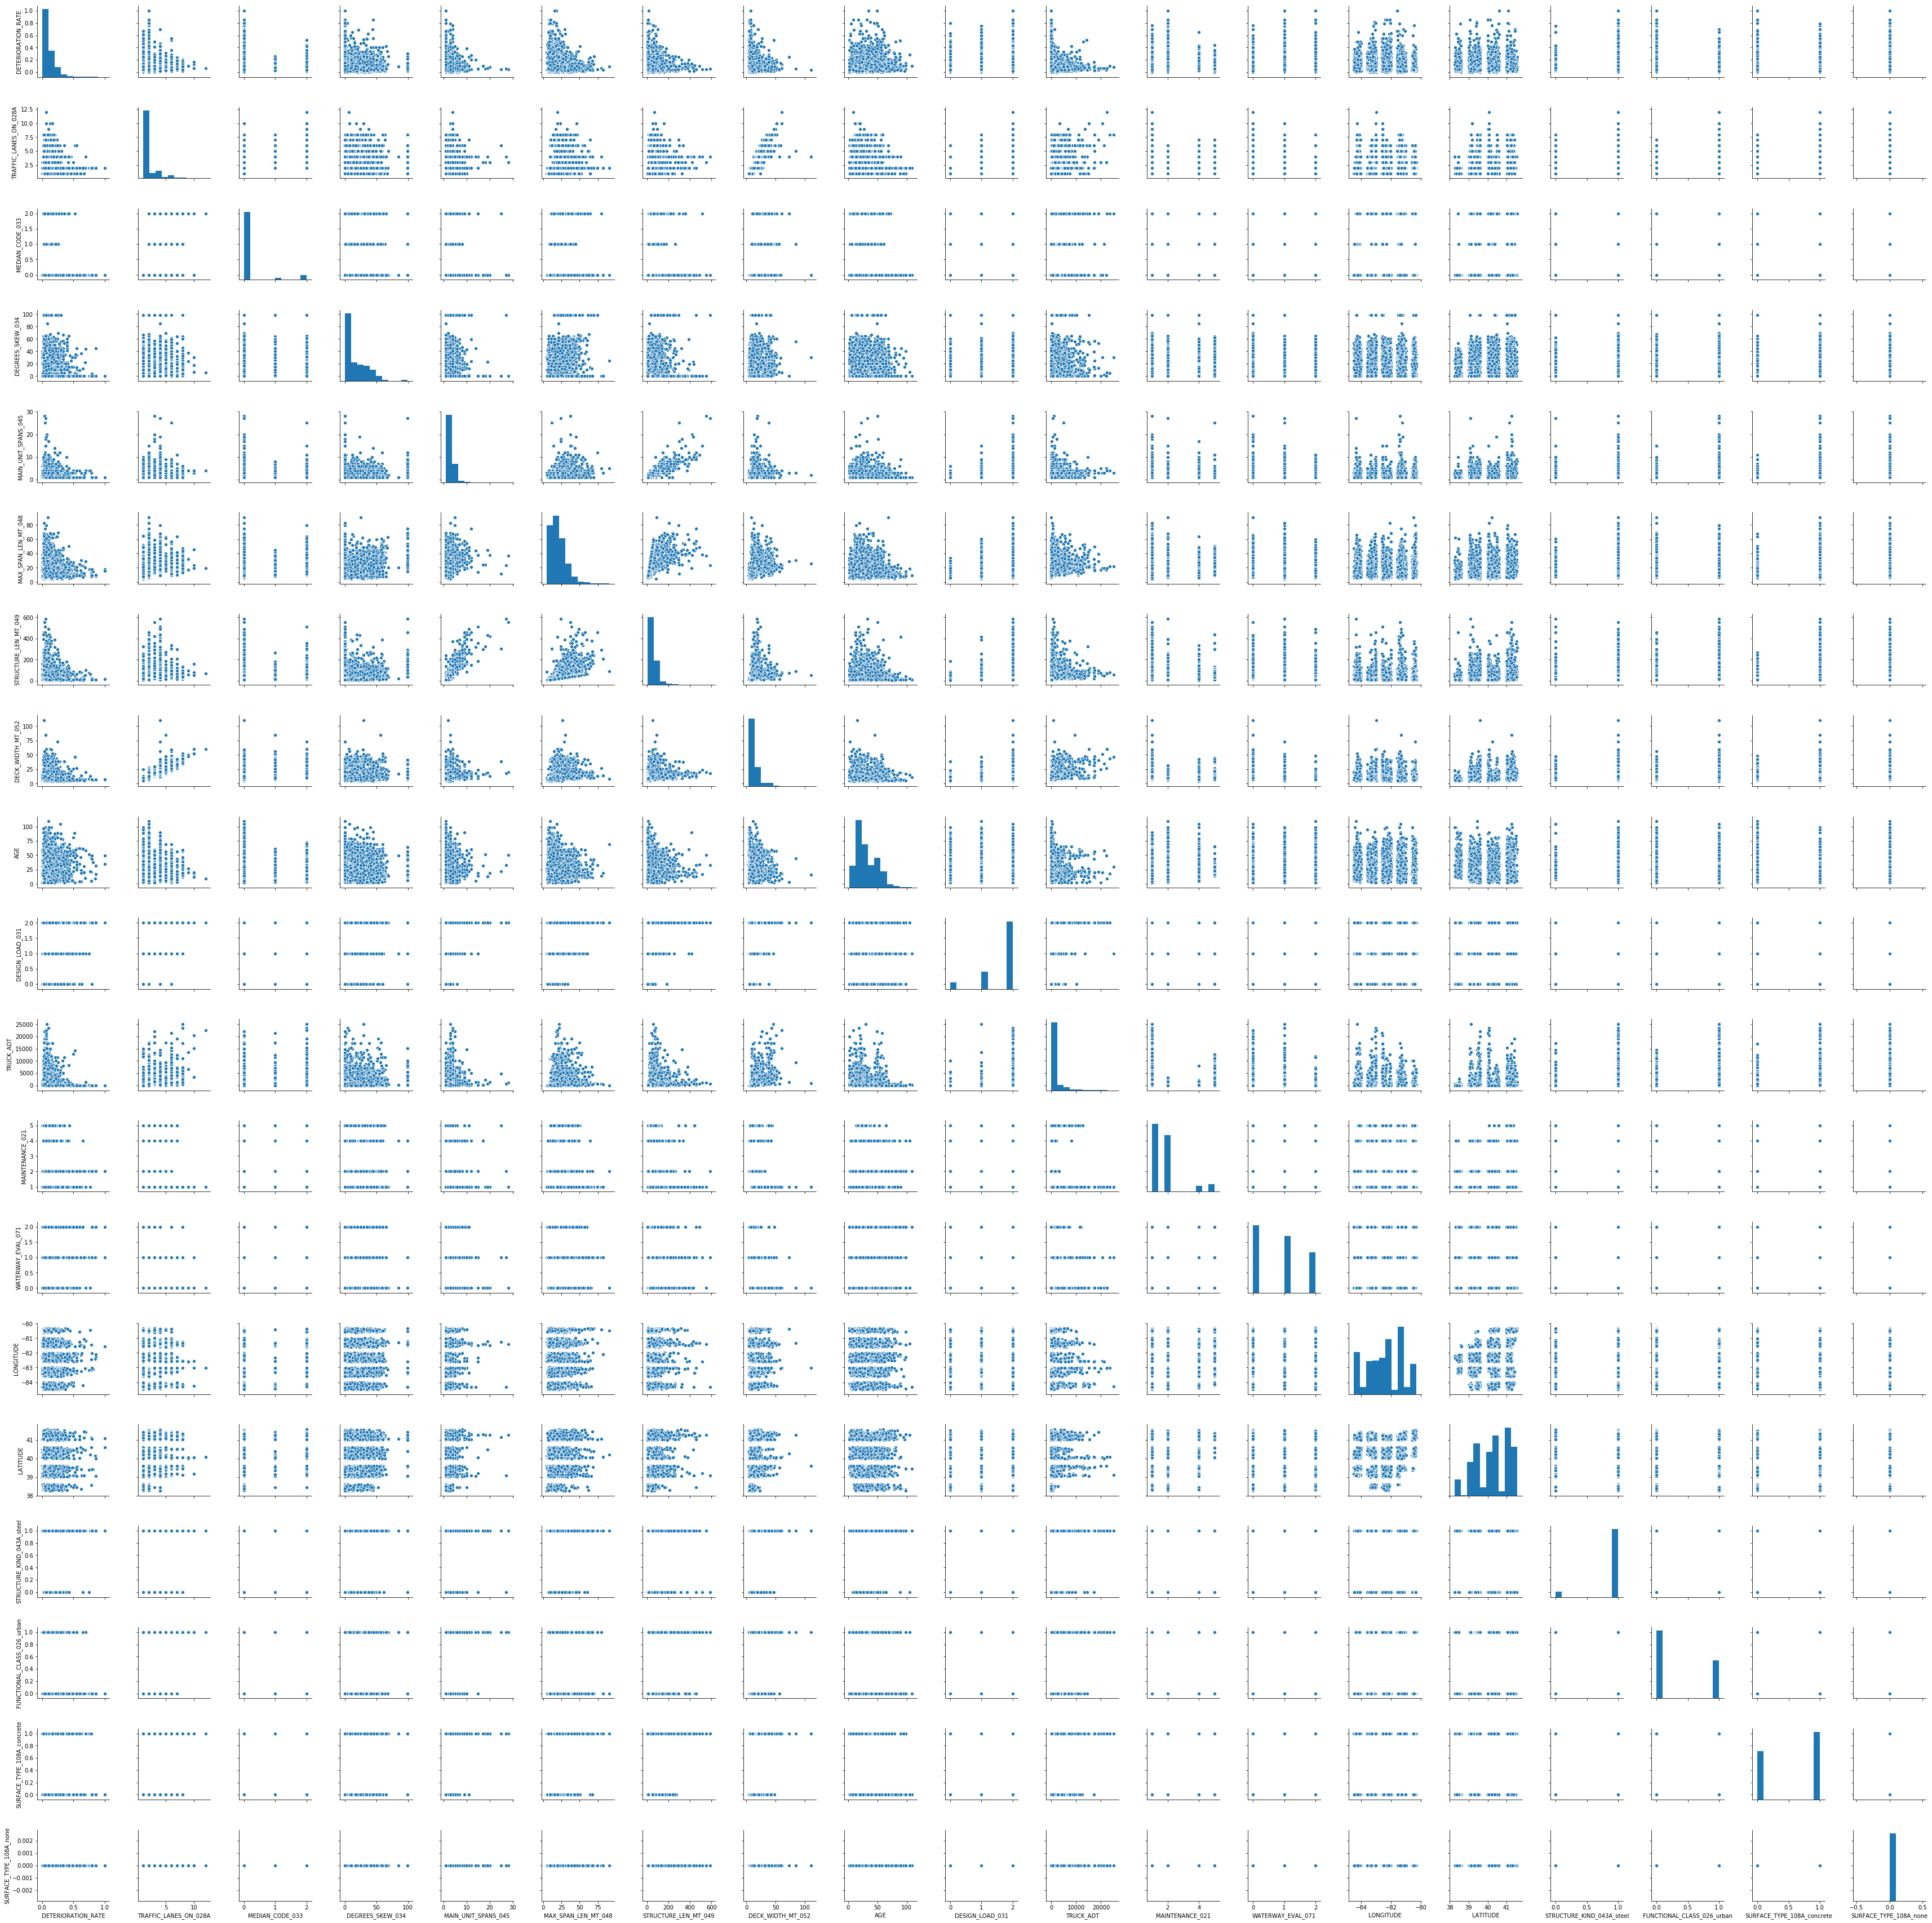

In [46]:
# Pair plot con solo OH
import seaborn as sns
sns.pairplot(df)

### Decission Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
regd_grid = GridSearchCV(DecisionTreeRegressor(),
                        param_grid={'max_depth': np.arange(2,8),
                                   'min_samples_leaf':[10,30,50,100]},
                         cv = 5,
                         scoring = 'neg_mean_absolute_error')

In [51]:
regd_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [53]:
np.sqrt(-regd_grid.best_score_)

0.2539073817099383

In [60]:
regd_final = regd_grid.best_estimator_

In [61]:
r2_score(y_test,regd_final.predict(X_test))

0.13850076830032687

### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [57]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [59]:
np.sqrt(-reg.best_score_)

0.2524634217000823

In [62]:
reggb_final = reg.best_estimator_

In [63]:
r2_score(y_test,reggb_final.predict(X_test))

0.19982731136649834

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rf = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid={"max_depth":np.arange(2,10),
                             'min_samples_leaf' : (2,4),
                             'n_estimators': (50, 100, 200, 500, 1000)},
                  scoring="neg_mean_absolute_error",
                  cv=5)

rf.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': (2, 4), 'n_estimators': (50, 100, 200, 500, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [108]:
np.sqrt(-rf.best_score_)

0.2518751015514246

In [109]:
rf.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'n_estimators': 1000}

In [110]:
regrf_final = rf.best_estimator_
r2_score(y_test,regrf_final.predict(X_test))

0.42596383618634137

In [111]:
regrf_final.feature_importances_

array([0.00667909, 0.00252495, 0.02792974, 0.00737496, 0.05491349,
       0.10566114, 0.14656844, 0.00895663, 0.13958241, 0.01701621,
       0.08447751, 0.00978922, 0.00733751, 0.1297108 , 0.1645919 ,
       0.00366304, 0.00266656, 0.08055639])

In [112]:
# Feature importance
rf_feature_list = pd.DataFrame(list(zip(X.columns,regrf_final.feature_importances_)), columns = ['Feature','Importance'])
rf_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,LATITUDE,0.164592
1,DECK_WIDTH_MT_052,0.146568
2,AGE,0.139582
3,LONGITUDE,0.129711
4,STRUCTURE_LEN_MT_049,0.105661
5,TRUCK_ADT,0.084478
6,elevation,0.080556
7,MAX_SPAN_LEN_MT_048,0.054913
8,DEGREES_SKEW_034,0.027930
9,DESIGN_LOAD_031,0.017016


### Poisson Regression

In [113]:
import statsmodels.api as sm

In [114]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [115]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     DETERIORATION_RATE   No. Observations:                 3469
Model:                            GLM   Df Residuals:                     3451
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.6
Date:                Sat, 16 Nov 2019   Deviance:                       216.74
Time:                        20:05:39   Pearson chi2:                     276.
No. Iterations:                     5   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
TRAFFIC_LANES_ON_028A          0.0319      0.094      0.339      0.735      -0.153       0.216
MEDI

In [116]:
poisson_predictions = poisson_training_results.get_prediction(X_test)

In [117]:
predictions_summary_frame = poisson_predictions.summary_frame()


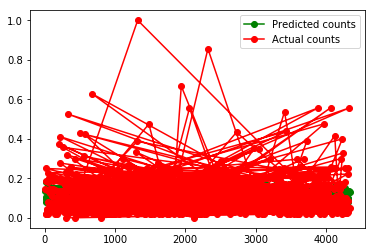

In [119]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()